# Prediction of Online Shoppers Purchasing Intention - datasource.ai

In this competition, we will analyze the activity of users who vist a service/product offered online through a website. The objective is to predict which visitors will decide to buy according to the characteristics and interactions they exhibit on the site.

In this special case, we are working with a classification/clustering problem. Of the 12.330 sessions on the website, 84.58% did not decide to make a purchase, which equals 10.422 and the rest ended up buying (1908)

The data set corresponds to 12,330 unique sessions per user, which are divided into

    8,631 for the training set (Train.csv)
    3,699 for the test.csv set (Test.csv)

This data was obtained over 12 months to avoid special day trends or specific campaigns. 

In the file SampleSubmission.csv you can find the way in which you should send the data, and whose characteristics are:

    You must send your submission file with only 2 columns
    Column 0 should be called: 'id’
    Column 1 should be called: 'revenue’
    The file must contain a total number of 3700 rows, where:
        First row is == header
        The other 3.699 rows == your predictions
    If you do not meet these rules within your submission file, the system will automatically reject it

Note: we recommend you to check the file SampleSubmission.csv, which will be like this:


id           revenue
                  
1            0
2            0 
3 	     1
4            0 
5            1  
6            1
etc.           

Variables definition:

    id: unique ID of the website visitor
    administrative: Number of times the user visited the administrative section
    administrative_duration: Total time the user spent in the administrative section
    informational: Number of times the user visited the informational section
    informational_duration: Total time the user spent in the informational section
    productrelated: Number of times the user visited the related products section
    productrelated_duration: Total time the user spent in the related products section
    bouncerates: This is the percentage of visitors who enter the page and immediately "bounce" without interacting with it. This metric is only taken into account if it is the first page they visit within the website.
    exitrates: From the total number of visits to the pages of the website, the percentage of visitors who logged out through this specific page is obtained, that is, it indicates the percentage of users whose last visit to the website was this specific page.
    pagevalues: This is the average value of the website, it indicates the contribution that this website made to the visitor arriving at the final purchase page or section. 
    specialday: Is the value that indicates the proximity to a special date such as Valentine's Day.  The range of this variable is 0 to 1, with 1 being the exact day of the special date and 0 if there is no range near that date.
    month: Month of the visit to the website.
    operatingsystems: Type of operating system
    browser: Name of the web browser
    region: Visitor's geographic region
    traffictype: Type of web traffic
    visitortype: Whether you are a new visitor or a returning visitor
    Weekend: 0 indicates that it is not a weekend day and 1 indicates that it is a weekend day.

Target variable:

    revenue: Variable to be classified, 1 indicates that the visitor has bought and 0 indicates that the visitor has not bought.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from pathlib import Path

sns.set(style='dark', context='notebook', palette='plasma')
random_state = 42

In [2]:
path = Path('C:\\Users\\desar\\OneDrive\\Escritorio\\data_science\\Prediction of Online Shoppers Purchasing Intention')

train = pd.read_csv(path/'train_set.csv', index_col = 'id')
test = pd.read_csv(path/'test_set.csv', index_col = 'id')

In [3]:
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
id,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


# EDA

El dataset ya esta limpio

In [4]:
train.shape, test.shape

((8631, 18), (3699, 17))

In [5]:
train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,revenue
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.042400,5.931044,0.059761,2.116672,2.357201,3.149345,4.073224,0.154443
std,3.291140,173.090680,1.280891,135.652626,44.379155,1828.486623,0.047272,0.047634,18.839500,0.196143,0.902649,1.717329,2.408908,4.023450,0.361394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.475000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,602.883333,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,1477.564759,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,2720.500000,24.000000,2195.300000,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8631 entries, 1 to 8631
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8631 non-null   int64  
 1   Administrative_Duration  8631 non-null   float64
 2   Informational            8631 non-null   int64  
 3   Informational_Duration   8631 non-null   float64
 4   ProductRelated           8631 non-null   int64  
 5   ProductRelated_Duration  8631 non-null   float64
 6   BounceRates              8631 non-null   float64
 7   ExitRates                8631 non-null   float64
 8   PageValues               8631 non-null   float64
 9   SpecialDay               8631 non-null   float64
 10  Month                    8631 non-null   object 
 11  OperatingSystems         8631 non-null   int64  
 12  Browser                  8631 non-null   int64  
 13  Region                   8631 non-null   int64  
 14  TrafficType             

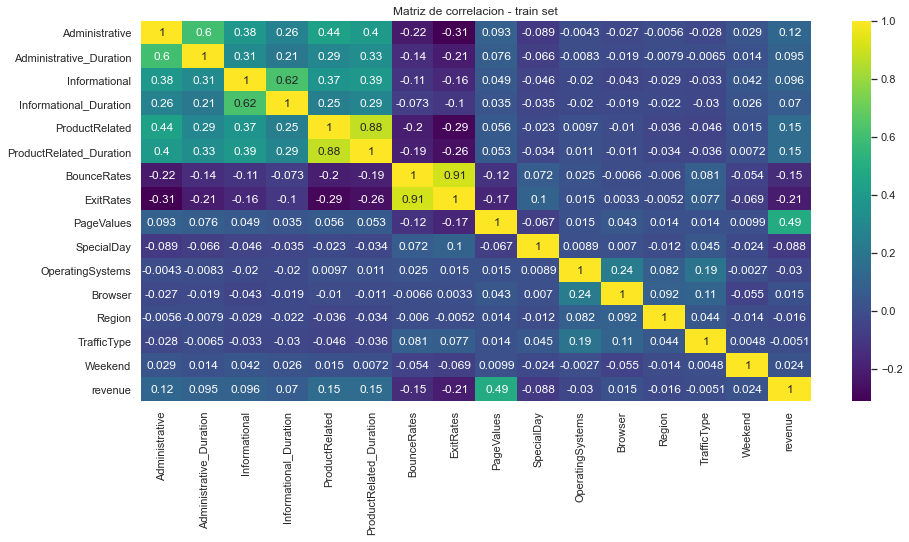

In [7]:
corr_matrix = train.corr()

_= plt.figure(figsize = (15,7))
_= plt.title('Matriz de correlacion - train set')
_= sns.heatmap(corr_matrix, cmap = 'viridis', annot = True)

plt.show()

In [8]:
corr_matrix['revenue'].sort_values()

ExitRates                 -0.205970
BounceRates               -0.149516
SpecialDay                -0.088374
OperatingSystems          -0.030024
Region                    -0.015983
TrafficType               -0.005069
Browser                    0.014909
Weekend                    0.023915
Informational_Duration     0.069555
Administrative_Duration    0.094848
Informational              0.096333
Administrative             0.122744
ProductRelated             0.145703
ProductRelated_Duration    0.148949
PageValues                 0.489142
revenue                    1.000000
Name: revenue, dtype: float64

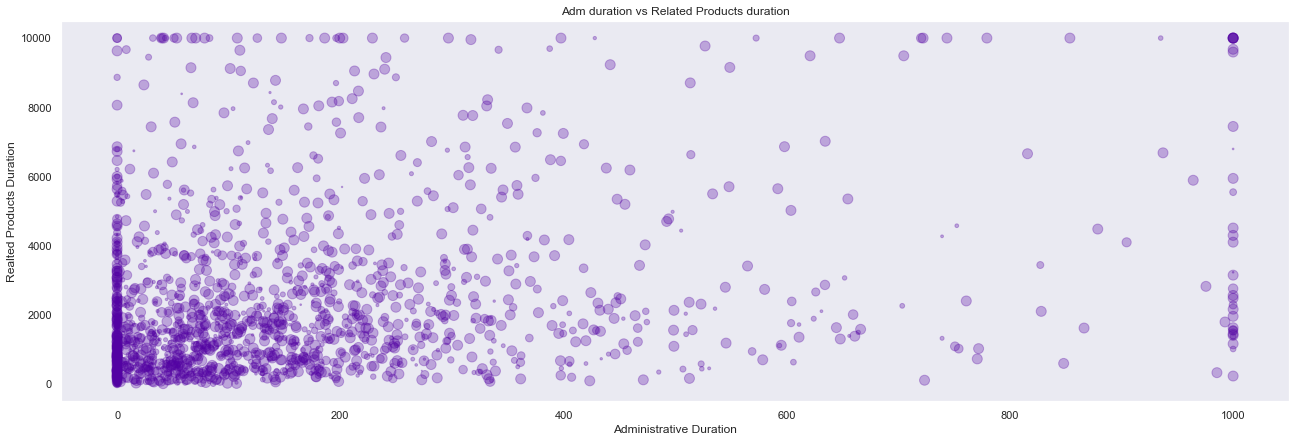

In [9]:
#Cut outliers for better visulization

train_v = train.copy()
train_v.loc[train.Administrative_Duration > 1000, 'Administrative_Duration'] = 1000
train_v.loc[train.ProductRelated_Duration > 10000, 'ProductRelated_Duration'] = 10000
train_v.loc[train.Informational_Duration > 100, 'Informational_Duration'] = 100

#Plot visualization

_= plt.figure(figsize = (22,7))
_= plt.title('Adm duration vs Related Products duration')
_= plt.xlabel('Administrative Duration')
_= plt.ylabel('Realted Products Duration')
_= plt.scatter(train_v.Administrative_Duration, train_v.ProductRelated_Duration, 
               train_v.Informational_Duration, alpha = .3)

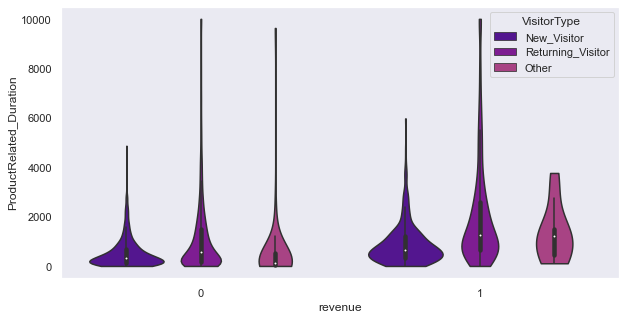

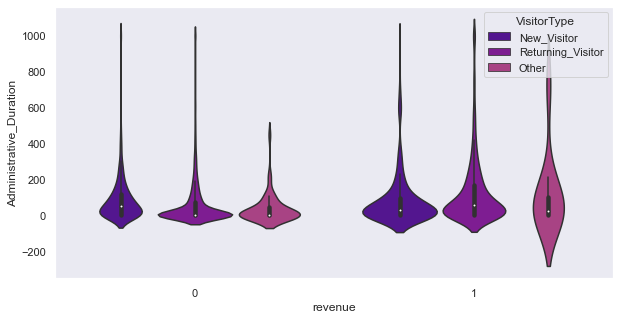

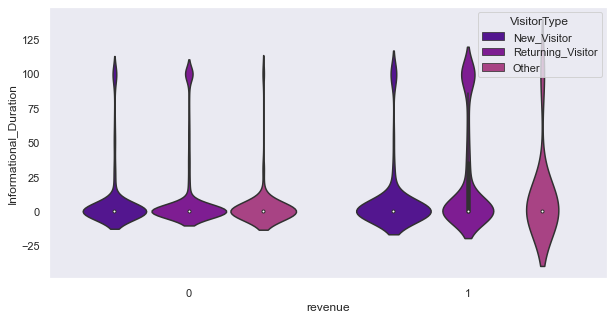

In [10]:
#Swarmplot takes really long to run when many values overlap, make violinplot instead

_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['ProductRelated_Duration'], hue =  train_v['VisitorType'], cut = 0)
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['Administrative_Duration'], hue =  train_v['VisitorType'])
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train_v['revenue'], train_v['Informational_Duration'], hue =  train_v['VisitorType'])
plt.show()

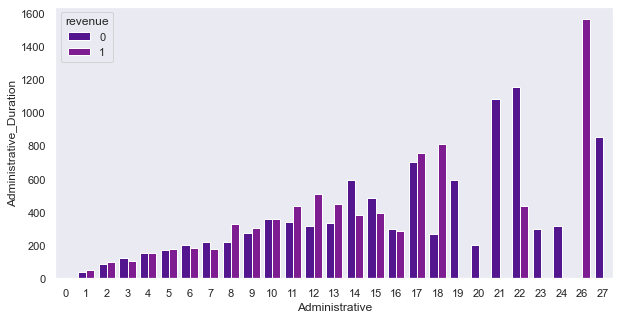

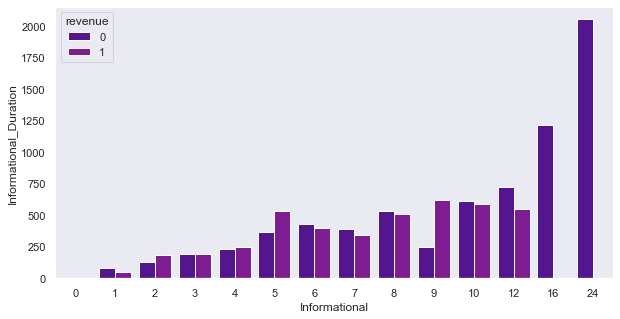

In [11]:
_= plt.figure(figsize = (10,5))
_= sns.barplot('Administrative', 'Administrative_Duration', hue = 'revenue', data = train, ci = False)
plt.show()
_= plt.figure(figsize = (10,5))
_= sns.barplot('Informational', 'Informational_Duration', hue = 'revenue', data = train, ci = False)
plt.show()

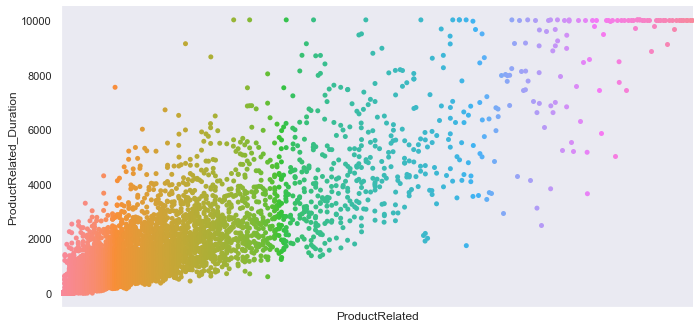

In [21]:
_= sns.catplot('ProductRelated', 'ProductRelated_Duration', data=train_v, height=5, aspect=2)
_= plt.xticks([])     #Delete x axis labels for cleannes
plt.show()

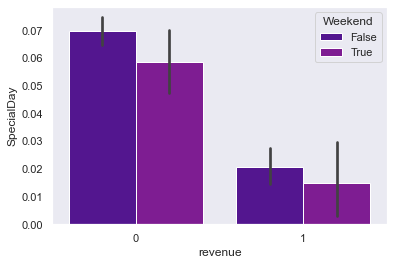

In [22]:
_= sns.barplot(train.revenue, train.SpecialDay, train.Weekend)
plt.show()

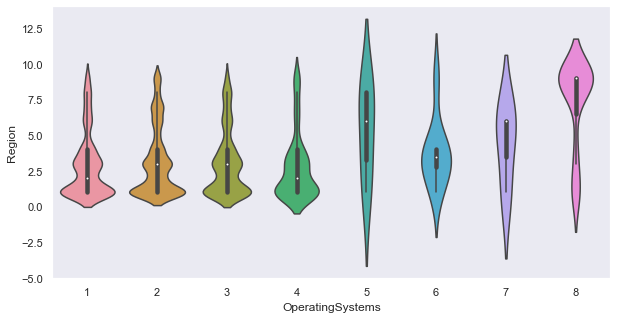

In [23]:
_= plt.figure(figsize = (10,5))
_= sns.violinplot(train.OperatingSystems, train.Region)

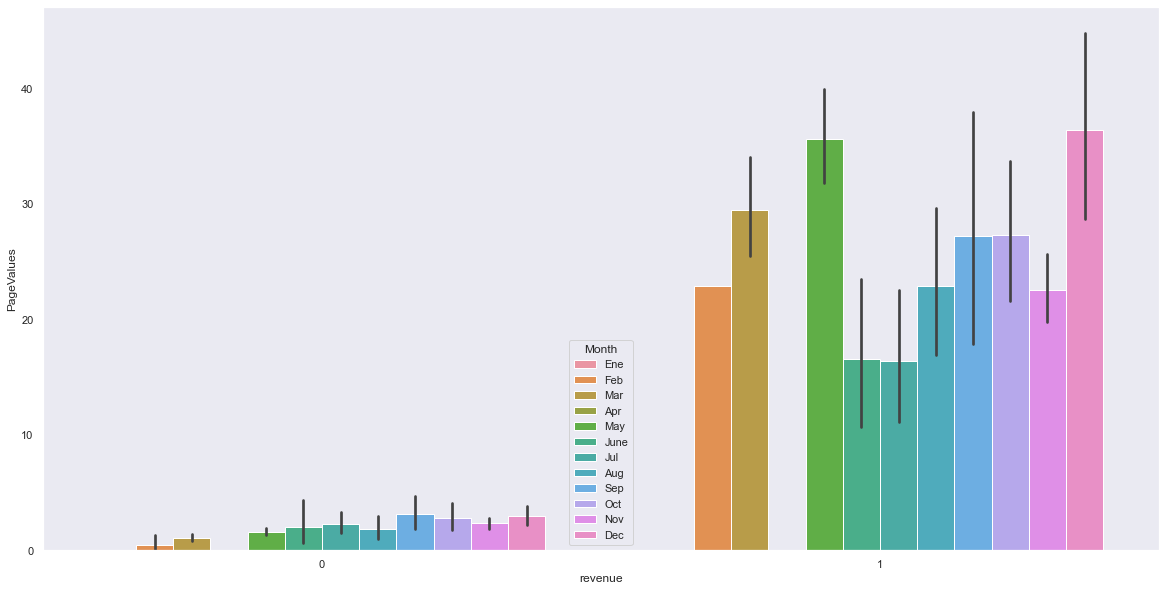

In [24]:
_= plt.figure(figsize = (20,10))
order = ['Ene', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_= sns.barplot(train.revenue, train.PageValues, train.Month, hue_order=order)

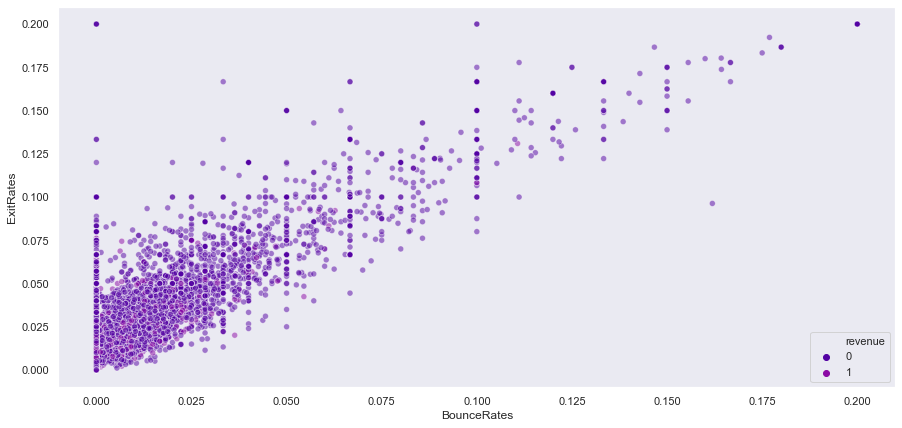

In [25]:
_= plt.figure(figsize = (15,7))
_= sns.scatterplot(train.BounceRates, train.ExitRates, train.revenue, alpha =.5)

In [26]:
train.Month.unique()

array(['Dec', 'Mar', 'Oct', 'May', 'Nov', 'Aug', 'Jul', 'Sep', 'Feb',
       'June'], dtype=object)

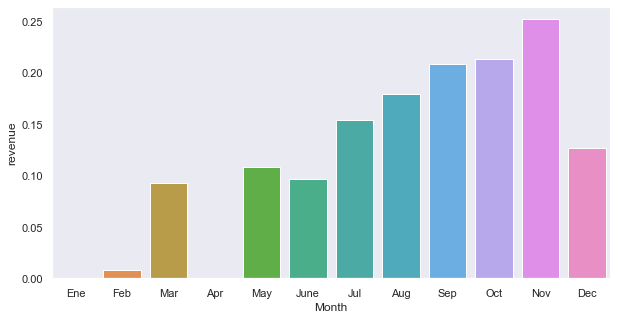

In [27]:
_= plt.figure(figsize = (10,5))
order = ['Ene', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_= sns.barplot('Month', 'revenue', data = train, ci = False, order=order)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


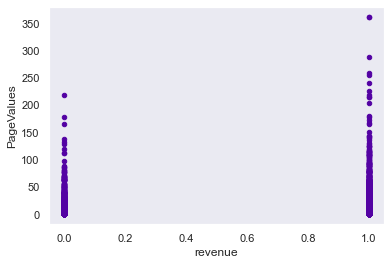

In [28]:
train.plot(kind='scatter', x='revenue', y='PageValues');

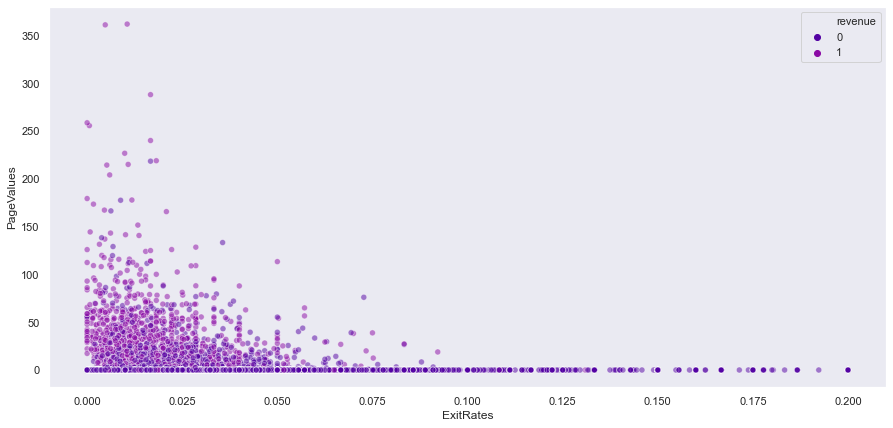

In [29]:
_= plt.figure(figsize = (15,7))
_= sns.scatterplot(train.ExitRates, train.PageValues, train.revenue, alpha =.5)

# Preprocessing

Preprocessing de las variables VisitorType, Weekend & Month

In [30]:
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
id,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [31]:
train.VisitorType.unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [32]:
VisitorType_map = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}
train.VisitorType = train.VisitorType.map(VisitorType_map)
test.VisitorType = test.VisitorType.map(VisitorType_map)

In [33]:
def WeekendMapping(x):
    """Maps Weekend bool var to binary var"""
    
    if x:
        return 1
    else:
        return 0

for df in [train, test]:
    df['WeekendOk'] = df.Weekend.apply(WeekendMapping)  
    df.drop('Weekend', axis=1, inplace=True)

In [34]:
ns = [i for i in range(len(train.Month.unique()))]
months = train.Month.unique().tolist()

MonthMapping = dict(zip(months, ns))
for df in [train, test]:
    df.Month = df.Month.map(MonthMapping)

In [62]:
train.SpecialDay.unique()

array([0. , 1. , 0.4, 0.2, 0.6, 0.8])

In [35]:
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,WeekendOk
id,,,,,,,,,,,,,,,,,
1,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,4,1,8,6,11,1,0
2,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,1,2,2,3,2,1,0
3,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,4,2,2,2,2,1,0
4,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,5,2,5,7,4,1,0
5,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,5,2,2,3,1,1,1


Standard Scaling de var continuas. No incluyo ratios ni variables que estan entre 0 y 1

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
               'PageValues']

pipeline = ColumnTransformer([
            ("num", StandardScaler(), num_attribs),
                            ])
X = train.copy()
X_test = test.copy()
X.drop('revenue', axis=1, inplace=True)
y = train['revenue']

X_ok = pipeline.fit_transform(X)
X_test_ok = pipeline.transform(X_test)

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(
                                        X_ok, y, test_size=0.2, 
                                        random_state=random_state)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape)

(6904, 4) (1727, 4) (6904,) (1727,) (3699, 17)


# Modelling

In [66]:
knc = KNeighborsClassifier()
knc_model = knc.fit(X_train, y_train)
y_pred = knc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7391151712785626

In [67]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred = logreg_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.6870836057456666

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
y_pred = lda.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.6665808610592703

In [69]:
svc = SVC(random_state=random_state, probability = True)
svc_model = svc.fit(X_train, y_train)
y_pred = svc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7593132168283108

In [70]:
tree = DecisionTreeClassifier(random_state=random_state)
tree_model = tree.fit(X_train, y_train)
y_pred = tree_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7170236981336431

In [71]:
forest = RandomForestClassifier(random_state=random_state)
rfc_model = forest.fit(X_train, y_train)
y_pred = rfc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7545572532593947

In [72]:
etc = ExtraTreesClassifier(random_state=random_state)
etc_model = forest.fit(X_train, y_train)
y_pred = etc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7545572532593947

In [73]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc_model = gbc.fit(X_train, y_train)
y_pred = gbc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7637060699306948

In [74]:
abc = AdaBoostClassifier(random_state=random_state)
abc_model = abc.fit(X_train, y_train)
y_pred = abc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7526673827425707

In [75]:
mlpc = MLPClassifier(random_state=random_state)
mlpc_model = mlpc.fit(X_train, y_train)
y_pred = mlpc_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7621801757140103

In [76]:
votingC = VotingClassifier(
    estimators=[('rfc', RandomForestClassifier(random_state = random_state)),
                ('extc', ExtraTreesClassifier(random_state = random_state)),                 
                ('gbc', GradientBoostingClassifier(random_state = random_state))],
    voting = 'hard', n_jobs = 6)

voting_model = votingC.fit(X_train, y_train)
y_pred = voting_model.predict(X_valid)

f1_score(y_valid, y_pred, average = 'macro')

0.7538023825252036

In [78]:
sub = gbc_model.predict(X_test_ok)

submission = pd.DataFrame({'id': test.index, 'revenue': sub})

submission.to_csv('submission.csv', index = False)